In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video4/video4.mp4


In [2]:
import os

!pip install roboflow
from roboflow import Roboflow
!pip install ultralytics
from ultralytics import YOLO

from IPython.display import Image
from IPython.display import Video
from numpy import save

import numpy as np
from ipywidgets import interact

from IPython.display import clear_output
clear_output()

In [3]:
model = YOLO('yolov8x.pt') #Extra Large (YOLOv8x) is the largest and most accurate

  0%|          | 0.00/131M [00:00<?, ?B/s]

In [4]:
os.mkdir('datasets')
os.chdir('datasets')

In [5]:
rf = Roboflow(api_key="qdf65LXUQOfnLJ64zaup")
project = rf.workspace("becode").project("bee-or-not-bee")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Bee-or-not-bee-1 in yolov8:: 100%|██████████| 614/614 [00:00<00:00, 1837.06it/s]


In [6]:
results = model.train(data="/kaggle/working/datasets/Bee-or-not-bee-1/data.yaml", epochs=50, plots=True)  # train the model

Ultralytics YOLOv8.0.28 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/kaggle/working/datasets/Bee-or-not-bee-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dy

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.Conv                  [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.Conv                  [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.C2f                   [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.Conv                  [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.C2f                   [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.Conv                  [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.C2f                   [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

In [7]:
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model 
# Validate the model
results = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.28 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /kaggle/working/datasets/Bee-or-not-bee-1/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]
                   all         50         50      0.765      0.791       0.84      0.605
                   bee         50         19      0.742      0.632      0.728      0.448
              mimicbee         50         15      0.859      0.867      0.904      0.723
                nonbee         50         16      0.693      0.875      0.888      0.645
Speed: 9.8ms pre-process, 36.3ms inference, 0.0ms loss, 2.3ms post-process per image


In [8]:
results = model.predict('/kaggle/working/datasets/Bee-or-not-bee-1/test/images', save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

image 1/32 /kaggle/working/datasets/Bee-or-not-bee-1/test/images/bee00003_jpg.rf.cebd62160359919891483a25c9a427e5.jpg: 640x640 35.7ms
image 2/32 /kaggle/working/datasets/Bee-or-not-bee-1/test/images/bee00016_jpg.rf.378698220b62380e97c874f4f457bcbf.jpg: 640x640 1 bee, 35.7ms
image 3/32 /kaggle/working/datasets/Bee-or-not-bee-1/test/images/bee00024_jpg.rf.094be5ba788e77787fc5dfb13f18b4cf.jpg: 640x640 35.7ms
image 4/32 /kaggle/working/datasets/Bee-or-not-bee-1/test/images/bee00042_jpg.rf.5db085f1fab2fab46dda4c0d6495eba7.jpg: 640x640 1 bee, 35.7ms
image 5/32 /kaggle/working/datasets/Bee-or-not-bee-1/test/images/bee00043_jpg.rf.9fb1738401cb76edb9a9914da9d1a918.jpg: 640x640 1 bee, 35.8ms
image 6/32 /kaggle/working/datasets/Bee-or-not-bee-1/test/images/bee00053_jpg.rf.f330c72ea0064023a5696ed7337a938b.jpg: 640x640 1 bee, 35.7ms
image 7/32 /kaggle/working/datasets/Bee-or-not-bee-1/test/images/bee00067_

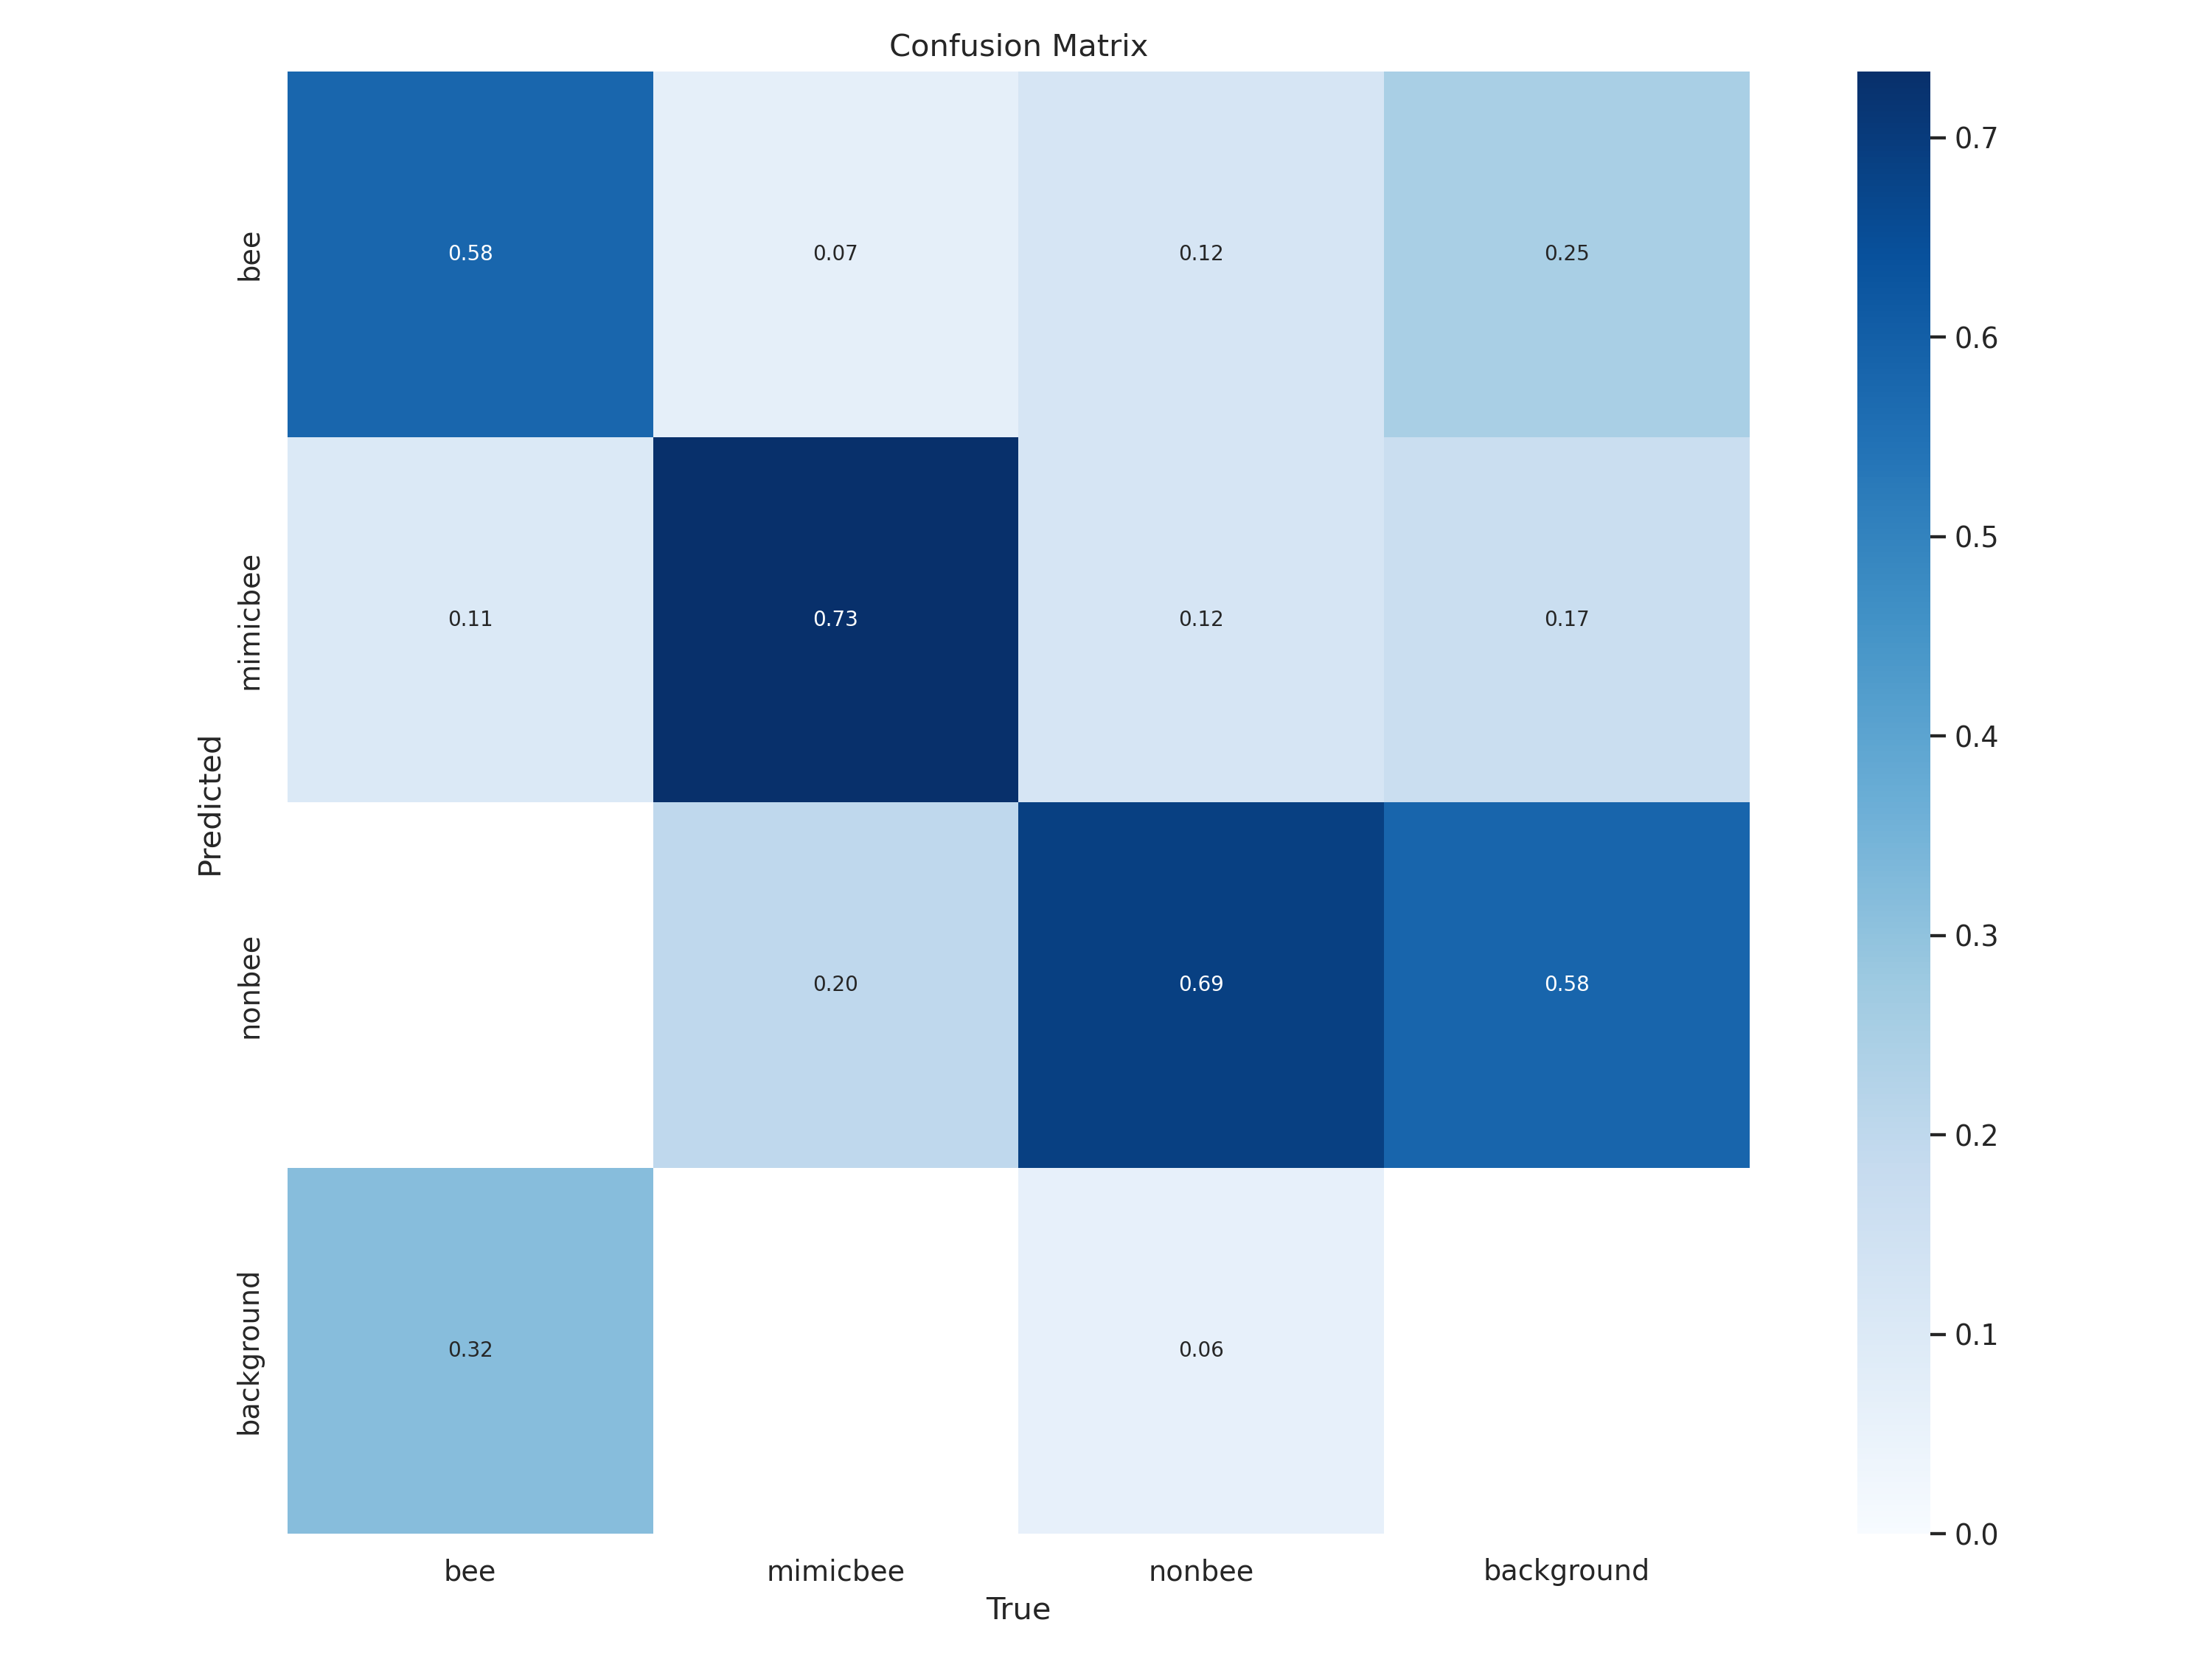

In [9]:
Image("/kaggle/working/datasets/runs/detect/train/confusion_matrix.png", height=300)

In [10]:
results = model.predict('/kaggle/input/video4/video4.mp4', save=True)
Video('runs/detect/predict/video4.mp4', height=300, embed=True)


video 1/1 (1/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 25.2ms
video 1/1 (2/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.5ms
video 1/1 (3/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.5ms
video 1/1 (4/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.4ms
video 1/1 (5/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.3ms
video 1/1 (6/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.6ms
video 1/1 (7/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.4ms
video 1/1 (8/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.6ms
video 1/1 (9/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.5ms
video 1/1 (10/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.6ms
video 1/1 (11/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.5ms
video 1/1 (12/339) /kaggle/input/video4/video4.mp4: 384x640 1 mimicbee, 24.5ms
video 1/1 (13/339) /kaggle/input/video4/video4.mp4: 384x640 